In [1]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)

import random
import time
import pickle

import sys
sys.path.append("../")

from src.object import *
from src.create import *
from src.print_result import *

from config.formation import *
from config.config import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [21]:
with open('../data/pickle/20221011v2_30y.pickle', mode='rb') as f:
    England = pickle.load(f)

In [22]:
#England = ProSoccerLeague(name="england", leagues=[L1, L2, L3])
all_member = pd.DataFrame()
for l in England.leagues:
    for t in l.teams:
        for p in t.affilation_players:
            buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "現役"]]), 
                                columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ", "pac", "sho", "pas", "dri", "def", "phy", "進退"])
            all_member = pd.concat([all_member, buff])
for p in England.retire_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "引退"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])

for p in England.free_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate,  p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "フリー"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])
all_member = all_member.reset_index(drop=True)

In [23]:
output = England.players_result

## Rateの分布

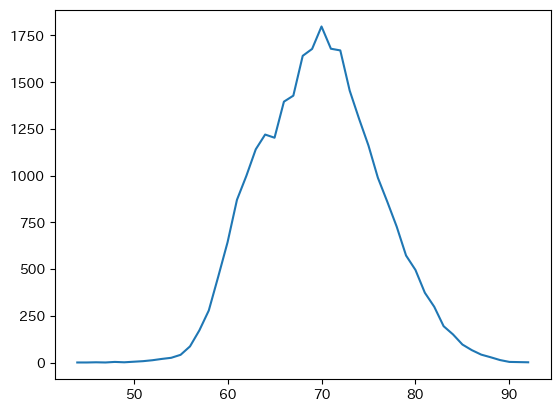

In [24]:
rate_list = output["Rate"].unique()
rate_list.sort()
rate_num = []
for rate in rate_list:
    rate_num.append(len(output.groupby("Rate").get_group(rate).groupby("uuid").mean()))
plt.plot(rate_list, rate_num)

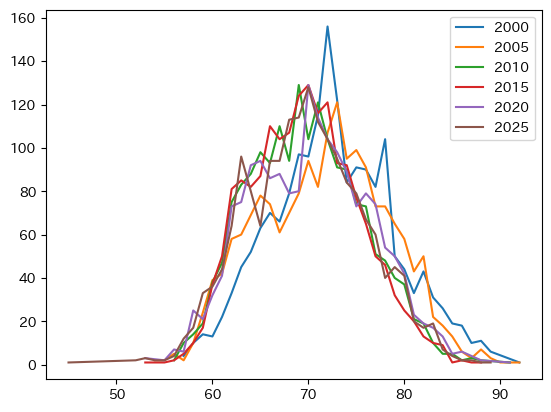

In [25]:
for i in range(2000, 2030, 5):
    output_ = output[output["年度"]==i]
    rate_list = output_["Rate"].unique()
    rate_list.sort()
    rate_num = []
    for rate in rate_list:
        rate_num.append(len(output_.groupby("Rate").get_group(rate).groupby("uuid").mean()))
    plt.plot(rate_list, rate_num, label=i)
plt.legend()
plt.show()

## 18歳のRate

In [26]:
output[output["年齢"]==18]["Rate"].value_counts(), len(output[output["年齢"]==18])

(68    456
 69    453
 67    428
 70    411
 61    377
 66    372
 60    341
 62    336
 59    314
 65    292
 63    292
 64    266
 71    237
 72    151
 58    139
 57     98
 73     82
 56     47
 74     40
 75     30
 76     17
 55      9
 54      3
 77      2
 79      2
 78      2
 Name: Rate, dtype: int64,
 5197)

## 怪我割合

In [27]:
print(output["怪我欠場"].sum()/3/20/30)
print(output[output["試合数"]>0]["怪我欠場"].value_counts())

102.43777777777777
0     40540
1      3407
2      1712
3      1485
4      1386
5      1321
6      1196
7      1080
8      1019
9       902
10      863
11      803
12      739
13      619
14      595
15      521
16      451
17      390
18      385
19      373
20      317
21      247
22      217
23      208
24      161
25      126
26      121
27       99
28       88
29       74
30       63
32       59
34       29
33       29
31       27
35       19
36       16
37       14
38        2
Name: 怪我欠場, dtype: int64


## 90以上の人数

In [28]:
output[output["Rate"]>89].groupby("uuid").mean()

,年齢,Rate,残契約,年度,試合数,goal,assist,CS,怪我欠場
uuid,,,,,,,,,
15edca2a-48b7-11ed-b2b6-00155d14f69a,27.5,92.000000,1.000000,2001.5,15.875000,10.250000,1.625000,7.750000,7.125
15f7ef32-48b7-11ed-b2b6-00155d14f69a,28.0,90.857143,0.571429,2010.0,21.500000,18.857143,2.428571,9.928571,0.000
1603102e-48b7-11ed-b2b6-00155d14f69a,28.5,91.500000,0.833333,2005.5,20.916667,0.000000,0.000000,8.666667,0.000
16357870-48b7-11ed-b2b6-00155d14f69a,28.0,90.000000,0.800000,2003.0,21.300000,0.000000,0.000000,12.700000,0.000
73c662b0-48b7-11ed-b2b6-00155d14f69a,27.5,90.833333,0.666667,2020.5,20.250000,2.500000,0.583333,5.750000,0.000


## チーム能力

In [29]:
for t in England.leagues[0].teams:
    print(t.name, t.formation.team_rate)

Wrexham {'ATT': 79.66666666666667, 'MID': 71.66666666666667, 'DEF': 78.5, 'GK': 77, 'ALL': 76.81818181818181}
Belfast {'ATT': 74.0, 'MID': 72.66666666666667, 'DEF': 76.75, 'GK': 85, 'ALL': 75.63636363636364}
Bradford {'ATT': 78.5, 'MID': 74.0, 'DEF': 78.25, 'GK': 75, 'ALL': 76.45454545454545}
Aberdeen {'ATT': 78.33333333333333, 'MID': 74.5, 'DEF': 80.33333333333333, 'GK': 72, 'ALL': 76.9090909090909}
Kilmarnock {'ATT': 77.66666666666667, 'MID': 71.75, 'DEF': 79.66666666666667, 'GK': 78, 'ALL': 76.0909090909091}
Motherwell {'ATT': 79.0, 'MID': 70.5, 'DEF': 78.66666666666667, 'GK': 84, 'ALL': 76.27272727272727}
Portsmouth {'ATT': 81.0, 'MID': 71.25, 'DEF': 77.0, 'GK': 75, 'ALL': 75.45454545454545}
Montevideo {'ATT': 83.5, 'MID': 75.5, 'DEF': 76.5, 'GK': 84, 'ALL': 78.0909090909091}
Birmingham {'ATT': 83.5, 'MID': 70.25, 'DEF': 75.5, 'GK': 77, 'ALL': 75.18181818181819}
Crewe {'ATT': 77.33333333333333, 'MID': 74.0, 'DEF': 75.25, 'GK': 80, 'ALL': 75.9090909090909}
Richmond {'ATT': 78.0, 'MI

## 引退年齢

In [30]:
all_member[(all_member["進退"]=="引退")].value_counts("年齢").sort_index()

年齢
27      3
28     11
29     31
30     65
31    228
32    368
33    493
34    599
35    571
36    410
37    298
38    141
39     54
40     10
41      3
dtype: int64

## 成長タイプ

In [31]:
all_member["成長タイプ"].value_counts()

general    3567
grass      1022
genius      445
legend       51
Name: 成長タイプ, dtype: int64

In [32]:
all_member[all_member["成長タイプ"]=="legend"].sort_values("年齢", ascending=False)

,名前,チーム,リーグ,uuid,年齢,生まれ年,ポジション,Rate,成長タイプ,pac,sho,pas,dri,def,phy,進退
3746,Maynard,Buenos Aires,EFL,16aa3e80-48b7-11ed-b2b6-00155d14f69a,41,1982,ST,70,legend,66,69,66,60,49,69,引退
2761,Stevin,Buenos Aires,EFL,15f453a4-48b7-11ed-b2b6-00155d14f69a,38,1982,LW,67,legend,69,56,69,63,51,54,引退
2087,Talmadge,Buenos Aires,EFL,16253a8c-48b7-11ed-b2b6-00155d14f69a,38,1982,GK,76,legend,15,15,15,15,15,15,引退
4419,Merdith,Buenos Aires,EFL,3c8edb10-48b7-11ed-b2b6-00155d14f69a,38,1986,LW,74,legend,76,63,72,71,62,65,引退
2924,Ecequiel,Buenos Aires,EFL,1647b120-48b7-11ed-b2b6-00155d14f69a,38,1982,CM,76,legend,64,67,76,75,71,71,引退
4975,Otis,Buenos Aires,EFL,73c0f136-48b7-11ed-b2b6-00155d14f69a,37,1992,CM,75,legend,68,42,77,76,79,43,引退
4220,De,Buenos Aires,EFL,69e0842e-48b7-11ed-b2b6-00155d14f69a,37,1991,GK,73,legend,15,15,15,15,15,15,引退
5014,Kenna,Buenos Aires,EFL,73c2d190-48b7-11ed-b2b6-00155d14f69a,37,1992,RW,68,legend,70,43,64,69,34,38,引退
324,Kenny,Richmond,premier,73c662b0-48b7-11ed-b2b6-00155d14f69a,37,1992,RW,80,legend,83,66,77,76,69,68,現役
3862,Amadeo,Buenos Aires,EFL,2505164e-48b7-11ed-b2b6-00155d14f69a,36,1983,LB,66,legend,63,47,64,65,65,57,引退


In [28]:
buff = output[output["分類"]=="練習リーグ"]
buff[buff["Rate"]>68].head(20)

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
7209,Mika,1f0fab26-486e-11ed-b4c6-b1071dd11c3e,24,69,0,CM,practice_league,2001,practice_team,練習リーグ,記録なし,20,0,0,0,0,
7227,Geno,1e904048-486e-11ed-b4c6-b1071dd11c3e,23,69,0,CB,practice_league,2001,practice_team,練習リーグ,記録なし,20,0,0,0,0,
7233,Loy,1e8f76d6-486e-11ed-b4c6-b1071dd11c3e,19,69,0,CM,practice_league,2001,practice_team,練習リーグ,記録なし,20,0,0,0,0,
7246,Raiford,1e1945a6-486e-11ed-b4c6-b1071dd11c3e,25,70,0,CDM,practice_league,2001,practice_team,練習リーグ,記録なし,20,0,0,0,0,
7248,Love,1f2491d0-486e-11ed-b4c6-b1071dd11c3e,23,69,0,CB,practice_league,2001,practice_team,練習リーグ,記録なし,20,0,0,0,0,
33662,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,19,69,0,ST,practice_league,2008,practice_team,練習リーグ,記録なし,20,0,0,0,0,
37576,Jvon,6e512304-486e-11ed-b4c6-b1071dd11c3e,24,69,0,LW,practice_league,2009,practice_team,練習リーグ,記録なし,20,0,0,0,0,
37592,Delwyn,067f2dd8-486f-11ed-b4c6-b1071dd11c3e,19,69,0,ST,practice_league,2009,practice_team,練習リーグ,記録なし,20,0,0,0,0,
37595,Billy,c69f7bd2-486e-11ed-b4c6-b1071dd11c3e,21,69,0,ST,practice_league,2009,practice_team,練習リーグ,記録なし,20,0,0,0,0,
37615,Jagdeep,a87a3e62-486e-11ed-b4c6-b1071dd11c3e,22,69,0,LW,practice_league,2009,practice_team,練習リーグ,記録なし,20,0,0,0,0,


,名前,年齢,生まれ年,成長タイプ
324,Kenny,37,1992,legend


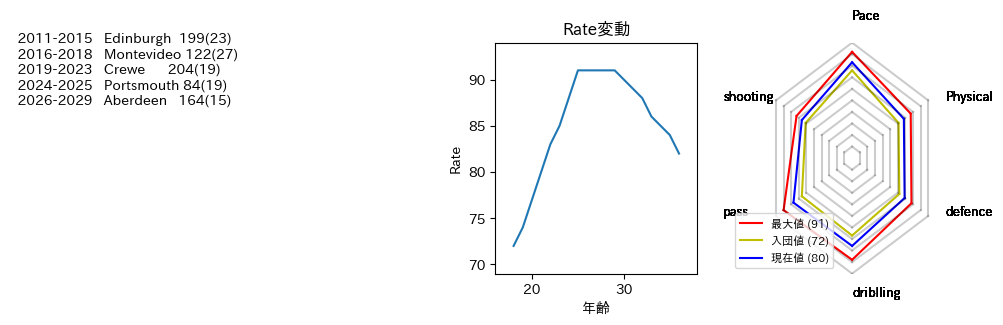

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,レンタル元,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
36872,Kenny,73c662b0-48b7-11ed-b2b6-00155d14f69a,18,72,4,LM,premier,2011,Edinburgh,,リーグ,13位,38,7,6,3,0,
40176,Kenny,73c662b0-48b7-11ed-b2b6-00155d14f69a,19,74,3,LM,premier,2012,Edinburgh,,リーグ,12位,38,3,2,4,0,
43423,Kenny,73c662b0-48b7-11ed-b2b6-00155d14f69a,20,77,2,CM,premier,2013,Edinburgh,,リーグ,12位,38,6,5,8,0,
46720,Kenny,73c662b0-48b7-11ed-b2b6-00155d14f69a,21,80,1,CB,premier,2014,Edinburgh,,リーグ,13位,38,6,3,6,0,
50008,Kenny,73c662b0-48b7-11ed-b2b6-00155d14f69a,22,83,0,CB,premier,2015,Edinburgh,,リーグ,19位,38,1,1,2,0,
54141,Kenny,73c662b0-48b7-11ed-b2b6-00155d14f69a,23,85,2,CM,premier,2016,Montevideo,,リーグ,3位,38,4,2,11,0,
57279,Kenny,73c662b0-48b7-11ed-b2b6-00155d14f69a,24,88,1,ST,premier,2017,Montevideo,,リーグ,5位,38,7,3,8,0,
60524,Kenny,73c662b0-48b7-11ed-b2b6-00155d14f69a,25,91,0,ST,premier,2018,Montevideo,,リーグ,13位,38,11,1,3,0,
63959,Kenny,73c662b0-48b7-11ed-b2b6-00155d14f69a,26,91,2,CB,premier,2019,Crewe,,リーグ,5位,38,2,1,15,0,
67199,Kenny,73c662b0-48b7-11ed-b2b6-00155d14f69a,27,91,1,CB,premier,2020,Crewe,,リーグ,2位,38,6,3,8,0,


In [34]:
uuid_ = "73c662b0-48b7-11ed-b2b6-00155d14f69a"
print_player(England, all_member, uuid_)

In [15]:
p = search_player(England, all_member, uuid_)

In [16]:
p.shooting_exp

2.5999999999999996

In [17]:
p.shooting_initial

66

In [18]:
output

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
0,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,18,68,4,None,premier,2007,Budapest,リーグ,16位,0,0,0,0,0,
1,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,18,68,4,None,premier,2007,Budapest,カップ戦,16位,0,0,0,0,0,
2,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,19,69,0,ST,practice_league,2008,practice_team,練習リーグ,記録なし,20,0,0,0,0,
3,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,20,69,4,None,EFL,2009,Rotterdam,リーグ,20位,0,0,0,0,0,
4,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,20,69,4,None,EFL,2009,Rotterdam,カップ戦,20位,0,0,0,0,0,
5,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,21,71,3,ST,EFL,2010,Rotterdam,リーグ,20位,16,3,1,0,0,
6,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,21,71,3,ST,EFL,2010,Rotterdam,カップ戦,20位,0,0,0,0,0,
7,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,22,72,2,ST,EFL,2011,Rotterdam,リーグ,10位,38,14,6,5,0,
8,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,22,72,2,ST,EFL,2011,Rotterdam,カップ戦,10位,1,0,0,0,0,
9,Yishay,e72af98a-486e-11ed-b4c6-b1071dd11c3e,23,74,2,None,championship,2012,Portsmouth,リーグ,8位,0,0,0,0,0,
